# Data Visualization
#### Kyle McLester

Using datasets provided by the UCI Data Repository
- Forest Fire Data: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
    - Using 'forestfires.csv' and 'forestfires.names'
- Auto MPG Data: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
    - Using 'auto-mpg.data-original'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Python dictionaries that map the expected strings contained withing the data to our specified output
monthdic = {b'jan': 1, b'feb':2, b'mar':3, b'apr':4, b'may':5, b'jun':6, 
            b'jul': 7, b'aug':8, b'sep':9, b'oct':10, b'nov': 11, b'dec': 12}
daydic = {b'mon': 1, b'tue':2, b'wed':3, b'thu':4, b'fri':5, b'sat':6, b'sun':7 }

def month_conv(s):
    """ Simple python function that returns the value from the monthdic given a key. """
    return monthdic[s]

def day_conv(s):
    """ Simple python function that returns the value from the daydic given a key. """
    return daydic[s]

# Returns a np.ndarray object
dat = np.loadtxt("datasets/forestfires.csv", delimiter=',', skiprows=1,
                 converters={2:month_conv, 3:day_conv})

dat # Adding a variable to the last line of a cell will automatically print its output below

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

In [5]:
# Or using lambda function 
dat = np.loadtxt("datasets/forestfires.csv", delimiter=',', skiprows=1, 
                 converters={2: lambda x: monthdic[x], 3: lambda x: daydic[x]})
dat

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

In [8]:
# Determine if any null values
np.isnan(dat)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
np.any(np.isnan(dat))

False

In [10]:
# Same as above, but readining in data with pandas
df = pd.read_csv('datasets/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [11]:
# Print first 5 rows of dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
# Retrun attributes
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [13]:
df.size

6721

In [14]:
df.isnull()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
np.any(df.isnull())

False

In [16]:
# Prints just the values in selected attribute column
df.loc[:, 'area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [17]:
# Returns common summary statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


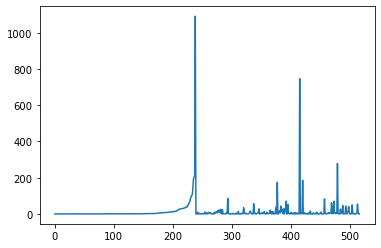

In [18]:
# Line plot of area column
plt.plot(df.loc[:, 'area'])

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

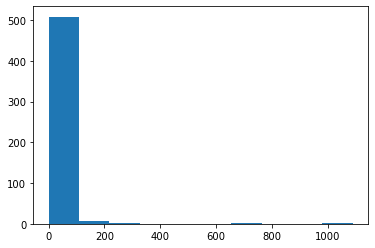

In [19]:
# Histogram of area
plt.hist(df.loc[:,'area'])

In [20]:
# Store in target feature T
T = df.loc[:, 'area'].copy()
T

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [21]:
# Store remaining features in X
X = df.iloc[:, :-1].copy()
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [22]:
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


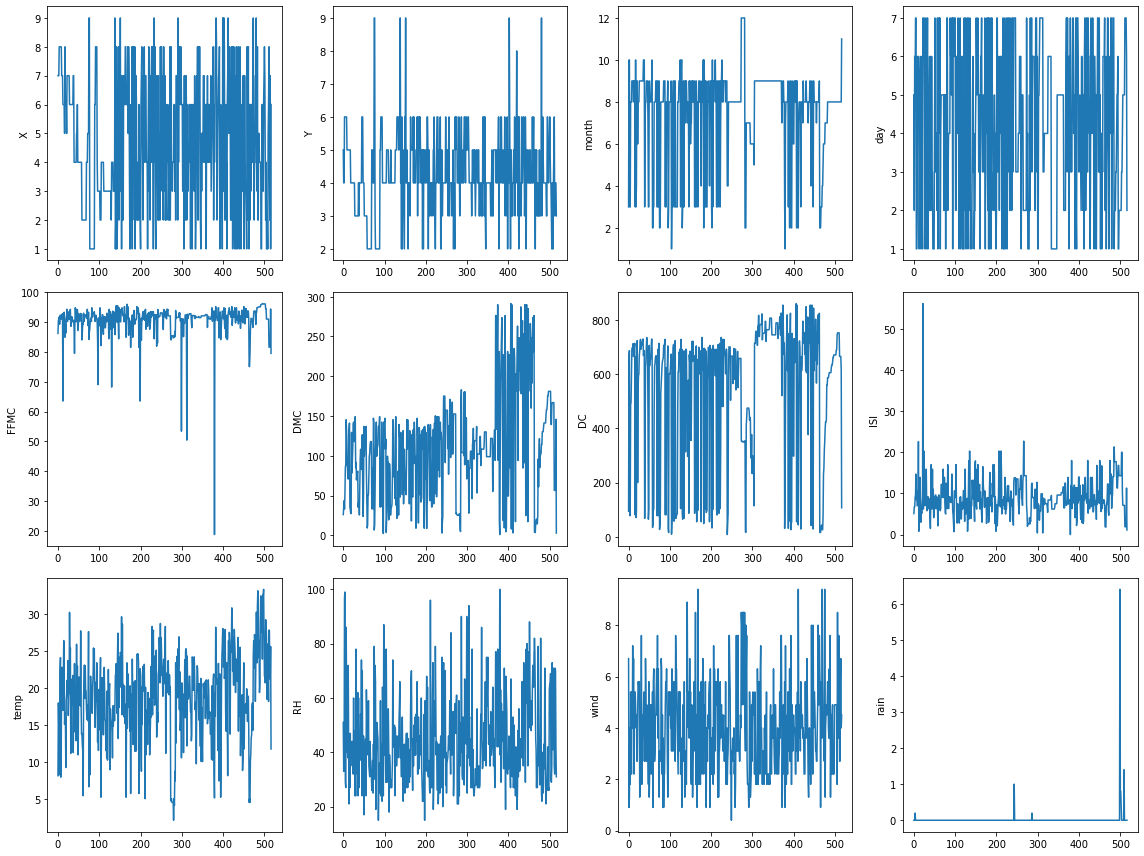

In [23]:
fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(12):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(X.iloc[:, i]) # Plots a given column
    plt.ylabel(X.columns.values[i]) # Sets Y label
fig.tight_layout()

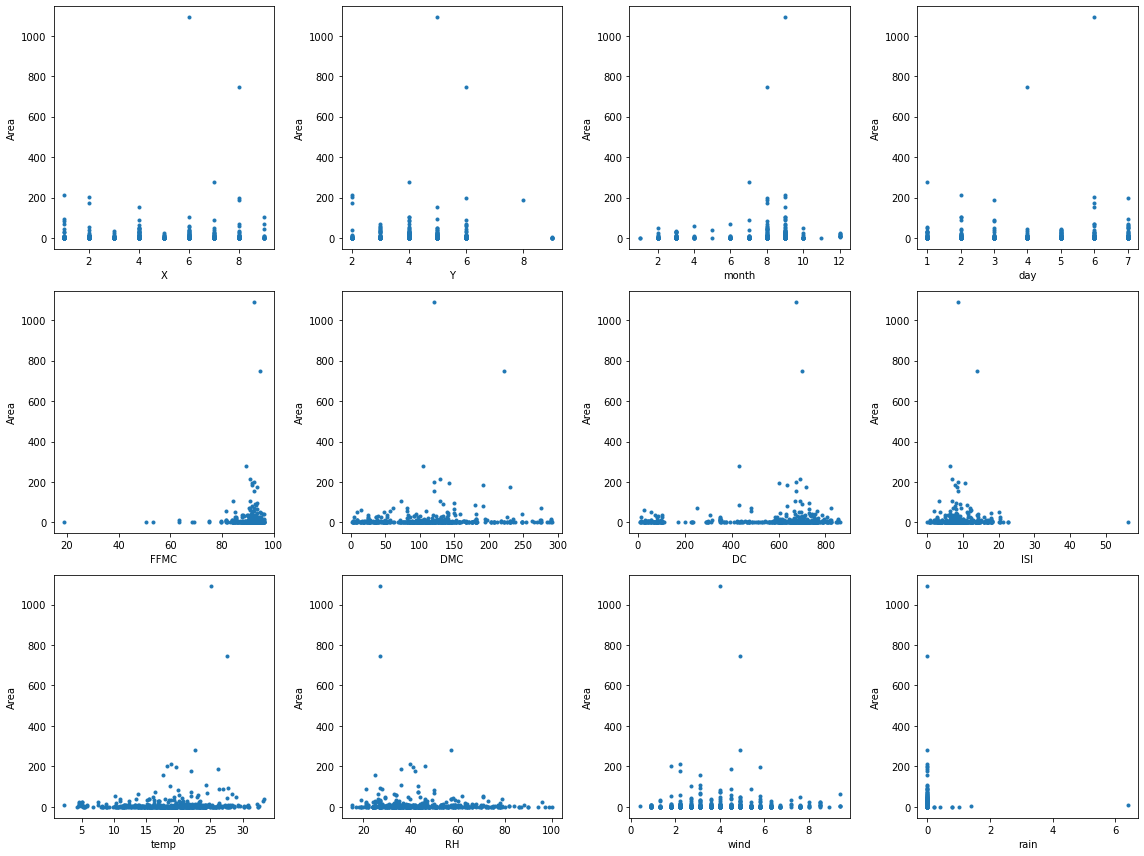

In [24]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Area')
fig.tight_layout()

In [25]:
D = pd.concat([X, T], axis=1)
D

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


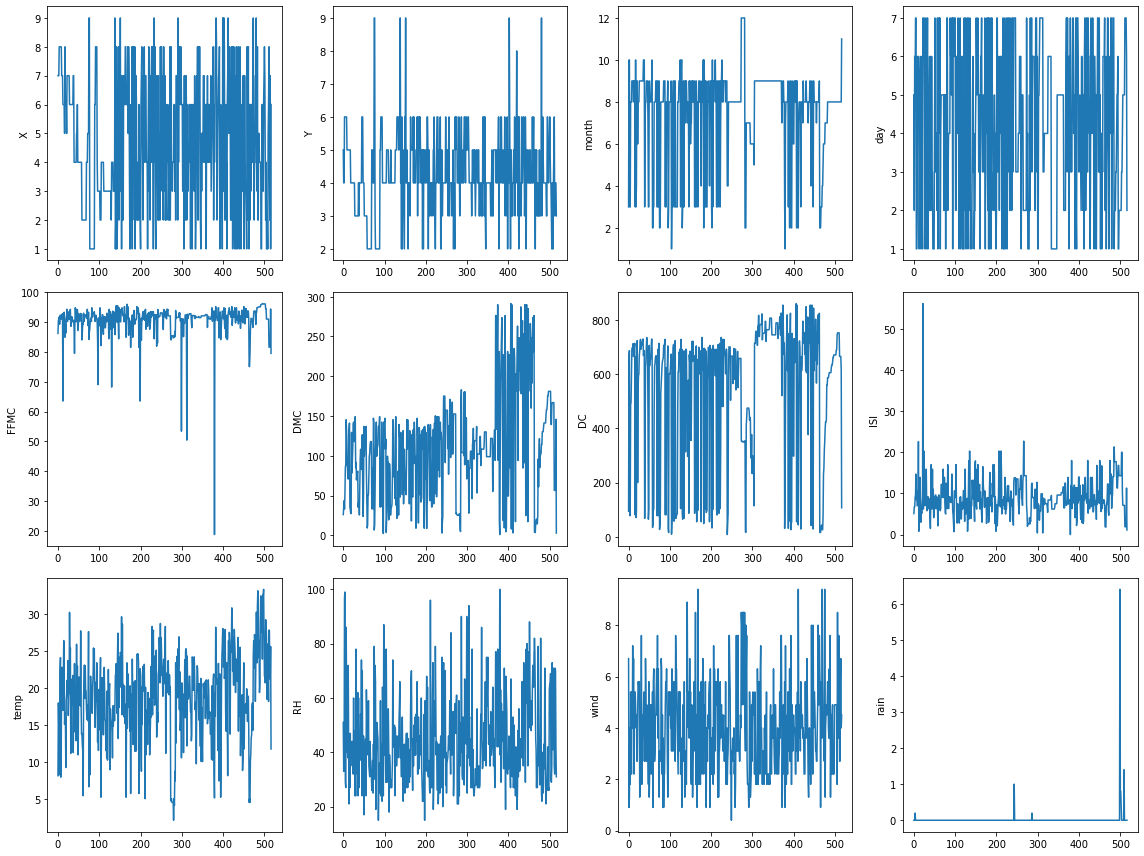

In [26]:
fig, axes = plt.subplots(3,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i, c in enumerate(X.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

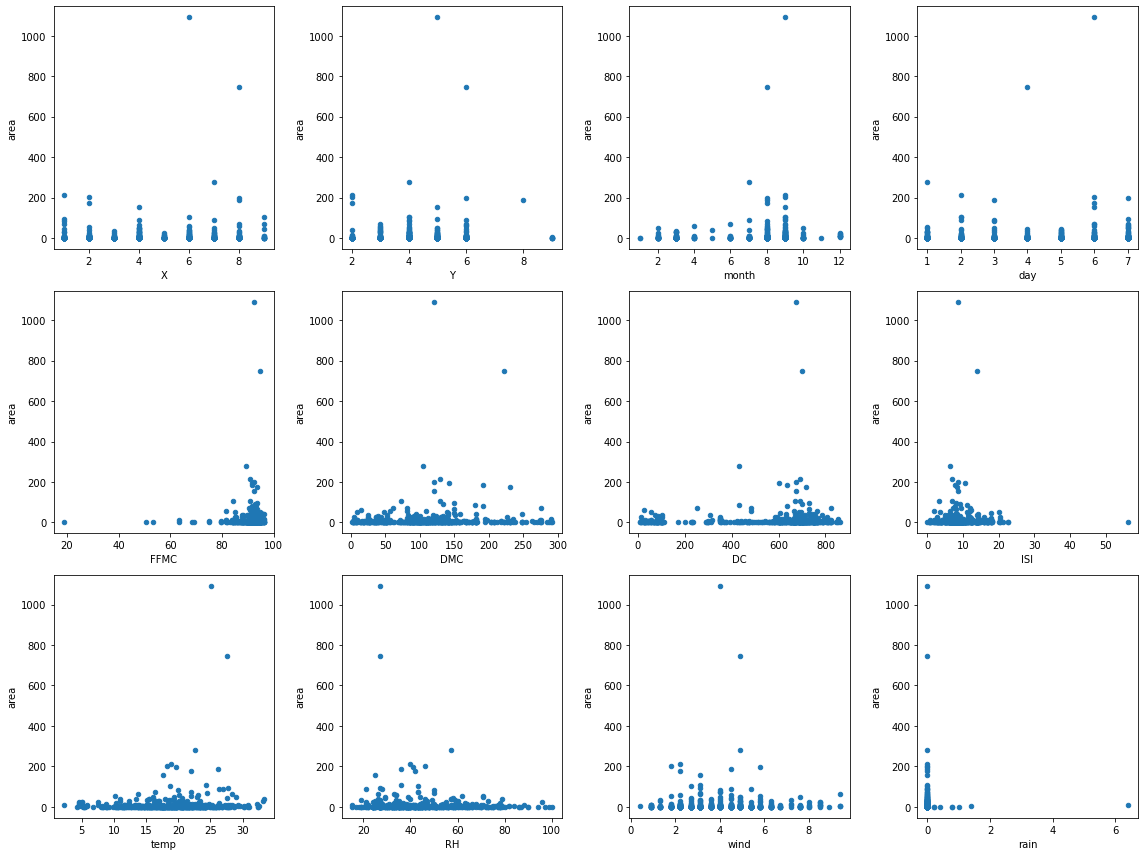

In [27]:
def area_scatter(D):
    """ Function to quickly create matplotlib subplots"""
    fig, axes = plt.subplots(3,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(X.columns.values):
        #D.plot.hexbin(c, 'area', ax=axes[int(i/4), i%4])
        D.plot.scatter(c, 'area', ax=axes[int(i/4), i%4])
    fig.tight_layout()
    
area_scatter(D)

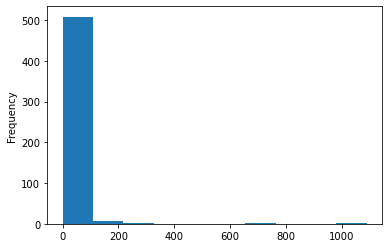

In [28]:
T.plot.hist()

In [29]:
# Example of what happens if you try to compute log(0)
np.log(T.iloc[0])

<ipython-input-29-99884cbb4af8>:2: RuntimeWarning: divide by zero encountered in log
  np.log(T.iloc[0])


-inf

In [30]:
Tlog = T.copy()
Tlog = T.apply(lambda x: np.log(x+1))
Tlog

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [31]:
pd.concat([T, Tlog], axis=1)

,area,area
0,0.00,0.000000
1,0.00,0.000000
2,0.00,0.000000
3,0.00,0.000000
4,0.00,0.000000
...,...,...
512,6.44,2.006871
513,54.29,4.012592
514,11.16,2.498152
515,0.00,0.000000


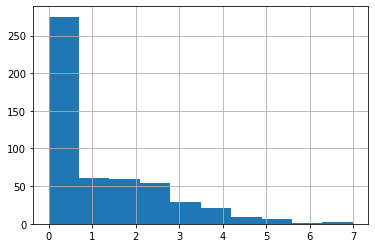

In [32]:
Tlog.hist()

In [33]:
D = pd.concat([X, Tlog], axis=1)

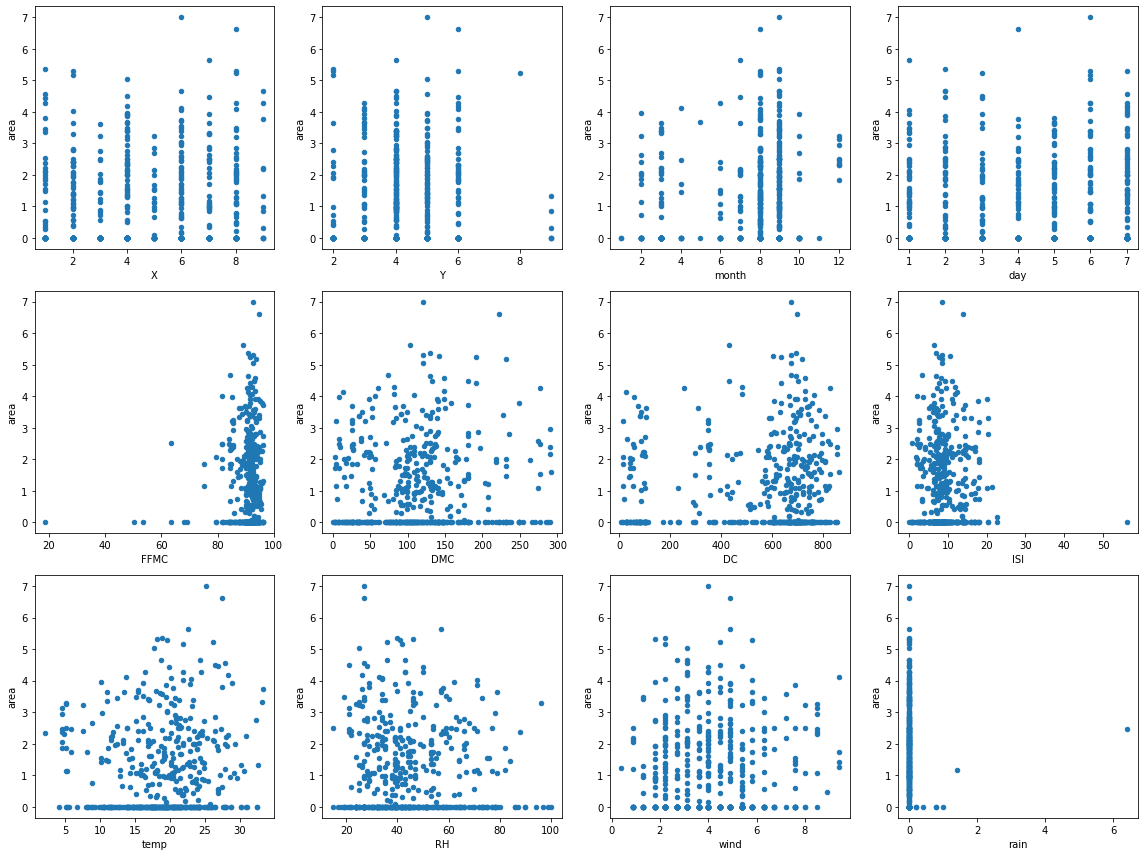

In [34]:
area_scatter(D)

In [35]:
df = pd.read_csv("datasets/auto-mpg.data-original", 
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight", 
                         "acceleration", "model year", "origin", "car name"],
                 delim_whitespace=True) # or delimiter="\s+")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [36]:
np.any(df.isnull())

True

In [37]:
np.where(df.isnull())

(array([ 10,  11,  12,  13,  14,  17,  38,  39, 133, 337, 343, 361, 367,
        382], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3], dtype=int64))

In [38]:
dfnew = df.dropna()
dfnew.shape

(392, 9)

In [39]:
np.any(dfnew.isnull())

False